In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from collections import defaultdict
sns.set_style("ticks")


In [4]:
params = {'axes.labelsize': 'large',
          'axes.titlesize':'large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)

In [5]:
df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/MSE~s_clustered.csv')
if 'Unnamed: 0' in list(df):
        df.drop('Unnamed: 0', axis = 1, inplace = True)

In [76]:
'Unnamed: 0' in list(df)

True

In [77]:
def findStopMSE(df):
    if 'Unnamed: 0' in list(df):
        df.drop('Unnamed: 0', axis = 1, inplace = True)
    index_to_be_used = []
    for ga in df['gamma'].unique():
        ga_df = df[df.gamma==ga]
        ga_index = list(ga_df.index)
        min_MSE = min(ga_df['MSE'])
        min_index = list(ga_df[ga_df.MSE==min_MSE].index)[0]
        for dex in ga_index:
            if dex <= min_index:
                index_to_be_used.append(dex)
        
    new = df.loc[index_to_be_used, :]
    new.index = range(len(new))
    return(new)
df = findStopMSE(df)

In [57]:
df

,n,gamma,s,ntree,time,MSE
0,10000,0.5,1,500,3.795719,415.055953
1,10000,0.5,4,500,3.827846,346.543320
2,10000,0.5,7,500,3.854506,327.963728
3,10000,0.6,1,500,9.515818,291.171482
4,10000,0.6,4,500,9.671705,250.037353
5,10000,0.6,7,500,9.711550,237.971111
6,10000,0.6,10,500,9.786736,238.052391
7,10000,0.6,13,500,9.859462,235.495379
8,10000,0.6,16,500,9.935246,234.754802
9,10000,0.7,1,500,24.289995,196.484442


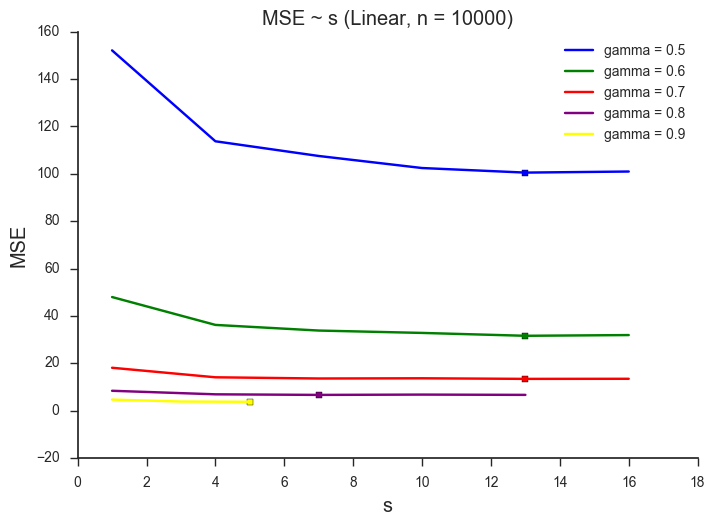

In [6]:
plt.figure()
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'yellow',1:'yellow'}
for ga in df['gamma'].unique():
    temp = df[(df['gamma']==ga) & (df.ntree==500)]
    minMSE = min(temp.MSE)
    minRow = temp[temp.MSE==minMSE]
    plt.scatter(minRow['s'], minRow['MSE'], c = color_dict[ga], marker = 's', label = None)
    
for ga in df['gamma'].unique():
    temp = df[(df['gamma']==ga) & (df.ntree==500)]
    if(ga==.1):
        plt.scatter(temp['s'], temp['MSE'], s = 20, c = color_dict[ga], label = "gamma = " + str(ga), marker = 's')
    else:
        plt.plot(temp['s'], temp['MSE'], c = color_dict[ga], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('s')
plt.ylabel('MSE')
plt.title('MSE ~ s (Linear, n = 10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~s_linear.png', dpi = 300, fmt = 'png')
plt.show()

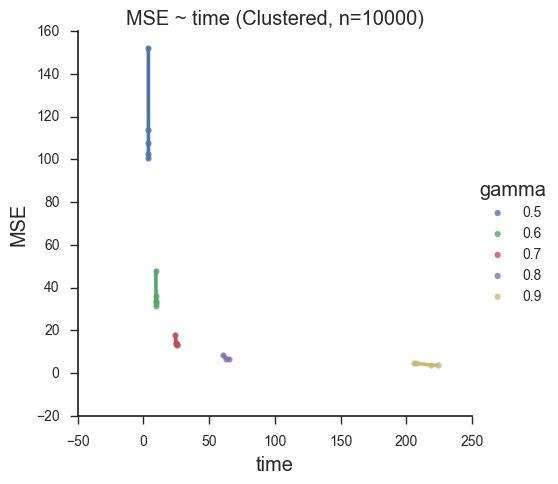

In [78]:
sns.lmplot(x = 'time', y = 'MSE', hue = 'gamma', data = df, col = 'ntree',lowess=True)
#plt.xlim(-15, 250)
#plt.ylim(-4, 160)
plt.title('MSE ~ time (Clustered, n=10000)')
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time_clustered.png', dpi = 300, fmt = 'png')
plt.show()

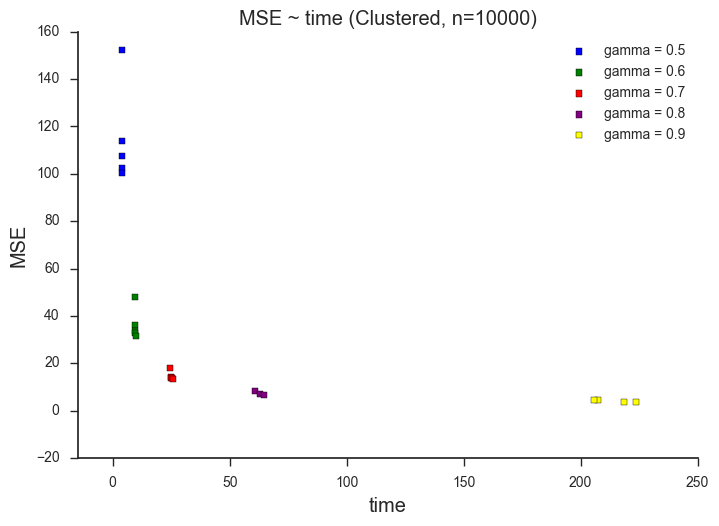

In [73]:
plt.figure()
symbol_list = ['o', 'v', ]
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'yellow',1:'yellow'}
marker_dict = {100:'o', 300: '*', 500:'s'}
for ga in df['gamma'].unique():
    for ntree in df['ntree'].unique():
        temp = df[(df['gamma']==ga) & (df['ntree']==ntree)]
        plt.scatter(temp['time'], temp['MSE'], c = color_dict[ga], marker = marker_dict[ntree], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('time')
plt.ylabel('MSE')
plt.xlim(-15,250)
#plt.ylim(-10,420)
plt.title('MSE ~ time (Clustered, n=10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time2_clustered.png', dpi = 300, fmt = 'png')
plt.show()

In [44]:
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))

In [45]:
pd.DataFrame(new_df)

,MSE,gamma
0,100.520528,0.5
1,31.608313,0.6
2,13.413855,0.7
3,6.643500,0.8
4,3.743293,0.9


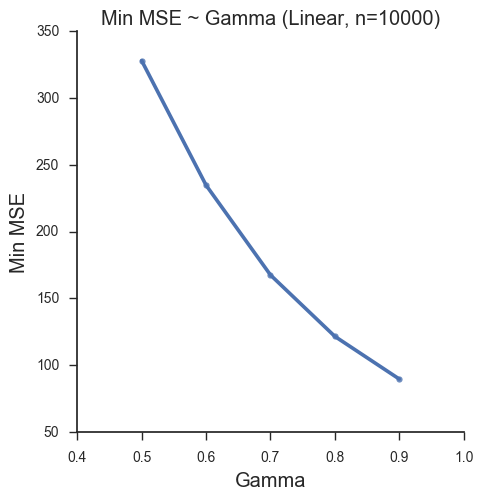

In [64]:
plt.figure()
color_dict = {.5:'y', .6:'orange', .7:'r', .8:'purple', .9:'b',1:'k'}
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))
    #plt.scatter(minRow['gamma'], minRow['MSE'], c = color_dict[ga], label = 'gamma = ' +str(ga),s = 40, marker='s')
new_df = pd.DataFrame(new_df)
sns.lmplot('gamma', 'MSE',data = new_df, lowess = True)
#sns.lmplot('gamma', 'MSE',data = new_df, hue = 'gamma',lowess = True)
plt.xlabel('Gamma')
plt.ylabel('Min MSE')
#plt.xlim(.46, .94)
#plt.ylim(-12,120)
plt.title('Min MSE ~ Gamma (Linear, n=10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MinMSE~gamma_linear.png', dpi = 300, fmt = 'png')
plt.show()